<a href="https://colab.research.google.com/github/EricOliveira17/Estudos-em-Data-Science-/blob/master/Classifica%C3%A7%C3%A3o_sobreviventes_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFICANDO SOBREVIVENTES OU NÃO NO NAUFRÁGIO DO TITANIC.

Bom a proposta da análise é classificar os passageiros entre sobreviventes ou não, logo tenho um problema de classificação, para resolver este tipo de problema usa-se modelos de aprendizado supervisionado para classificação.

In [1]:
# importando bibliotecas para analises
import pandas            as pd 
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
# Carregando o dataset através da biblioteca seaborn 
titanic = sns.load_dataset('titanic')

In [3]:
 
# Visualizando primeiras linhas do conjunto de dados 
titanic.head ()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Fase de tratamento dos dados,identificar padrões,valores faltantes, correlações entre variáveis e transformações de variáveis para a seleção dos melhores atributos.

In [4]:
# Visualizando a totalidade de valores faltantes entre as colunas
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#Visualizando distribuição de pessoas por sexo entre os integrantes abordo 
titanic.sex.value_counts ()

male      577
female    314
Name: sex, dtype: int64

In [6]:
# Criando função para transformar os valores de sexo que estão como objetos 
# Para números inteiros onde o número 1 representa "mulheres" e o número 0 "homens"
def sexo_binario (valor):
   if valor == "female":
     return 1
   else:
     return 0
 
titanic["sexo_numerico"] = titanic["sex"].map(sexo_binario)

In [7]:
# Visualizando distribuição de pessoas por sexo entre os integrantes abordo
# Agora com sexo em formato númerico 
titanic.sexo_numerico.value_counts ()

0    577
1    314
Name: sexo_numerico, dtype: int64

In [8]:
 
# Substituindo valores ausentes na coluna idade , pela própria média das idades
# transformando coluna "idade" de valor flutuante para valor inteiro
media_idade = titanic["age"].mean ()
titanic["age"] = titanic["age"].fillna(media_idade).astype(int)

In [9]:
 
# Visualizando informações de todas as colunas 
titanic.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   survived       891 non-null    int64   
 1   pclass         891 non-null    int64   
 2   sex            891 non-null    object  
 3   age            891 non-null    int64   
 4   sibsp          891 non-null    int64   
 5   parch          891 non-null    int64   
 6   fare           891 non-null    float64 
 7   embarked       889 non-null    object  
 8   class          891 non-null    category
 9   who            891 non-null    object  
 10  adult_male     891 non-null    bool    
 11  deck           203 non-null    category
 12  embark_town    889 non-null    object  
 13  alive          891 non-null    object  
 14  alone          891 non-null    bool    
 15  sexo_numerico  891 non-null    int64   
dtypes: bool(2), category(2), float64(1), int64(6), object(5)
memory usage: 87.6+ KB


In [10]:
# Visualizando valores descritivos 
titanic.describe ()

,survived,pclass,age,sibsp,parch,fare,sexo_numerico
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


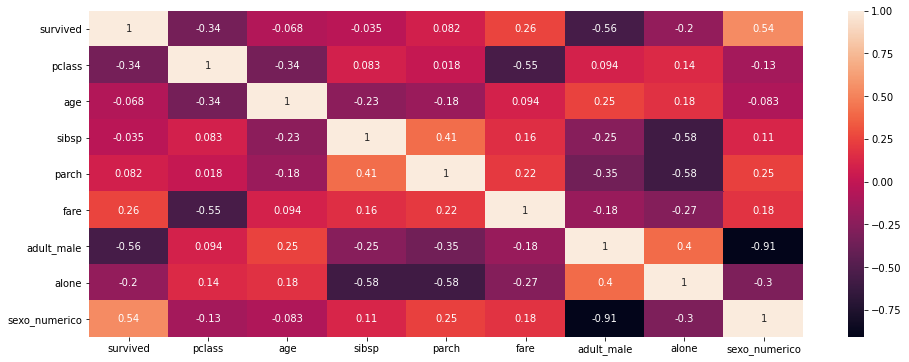

In [11]:
 
# Visualizando correlações entre variáveis 
correlacao = titanic.corr()
plt.figure(figsize=(16,6))
sns.heatmap(data=correlacao,annot=True);

### Selecionando as variáveis que melhor se adequam para a classificação dos modelos e aplicando os modelos.

In [12]:
# Atribuindo os atributos preditivos a variável X -("independente")
# Atribuindo a variável alvo preditora  Y -("dependente")
X = titanic[["age","fare","sexo_numerico","pclass","sibsp","parch"]]
y = titanic["survived"]

In [13]:
# importando bibliotecas de modelos de machine learning  
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
# Metricas de avaliação
from sklearn.metrics         import accuracy_score, f1_score, precision_score, confusion_matrix

In [15]:
# Divisão dados de treino e teste
np.random.seed(0)
X_treino,X_valid,y_treino,y_valid = train_test_split (X,y,
                                                      test_size=0.5,
                                                      random_state=2)

In [16]:
 
# A forma como os dados são divididos pelo train_test_split
X_treino.shape,X_valid.shape,y_treino.shape,y_valid.shape

((445, 6), (446, 6), (445,), (446,))

#### Primeiro modelo - Floresta Aleatória Classificador  (mix de árvores de decisão) - método ensemble(conjunto)

In [17]:
# Instânciando modelo
#1°
modelo_RFC = RandomForestClassifier (bootstrap=True,
                                     n_estimators=1000,
                                     n_jobs=-1,
                                     random_state=42,
                                     max_features='sqrt')

In [18]:
# MODELO RANDOM FOREST CLASSIFIER 
# fit 
modelo_RFC.fit (X_treino,y_treino)
# predict
y_pred = modelo_RFC.predict(X_valid)

In [19]:
# Precisão do modelo_RFC
print("modelo_RFC Acuracia:{}".format(accuracy_score(y_valid,y_pred)))
print("f1_score:{}".format(f1_score(y_valid,y_pred)))
print("precision_score:{}".format(precision_score(y_valid,y_pred)))
print("matriz_confusao:{}".format(confusion_matrix(y_valid,y_pred)))

modelo_RFC Acuracia:0.8139013452914798
f1_score:0.7580174927113702
precision_score:0.7784431137724551
matriz_confusao:[[233  37]
 [ 46 130]]


A acurácia do modelo é de 81% ou seja o modelo classifica dentro de uma amostra de 100 tripulantes que 81 sobrevivem ou não🚢🔍

##Vou verificar se eu e minha família sobreviveriamos ao náufrago do Titanic.
 
No array do numpy vou considerar a idade do tripulante,valor médio de embarque(32.20),sexo(0 = homem,1 = mulher),número da classe (2, segunda classe),acompanhados(1,sim), quantidade de pais e filhos a bordo(2)

In [20]:
# Listando os atributos de acordo aos dados de treino (X) recebidos no período de seleção de features(variáveis preditoras) no início da análise.
 
Eric = np.array([22, 32.2, 0, 2, 1, 2]).reshape((1, -1))
Emily = np.array([14, 32.2, 1, 2, 1, 2]).reshape((1, -1))
Maria = np.array([47, 32.2, 1, 2, 1, 2]).reshape((1, -1))
Antonio = np.array([57, 32.2, 0, 2, 1, 2]).reshape((1, -1))

In [21]:
print("Eric:   \t{}".format(modelo_RFC.predict(Eric)[0]))
print("Emily:  \t{}".format(modelo_RFC.predict(Emily)[0]))
print("Maria:  \t{}".format(modelo_RFC.predict(Maria)[0]))
print("Antonio:\t{}".format(modelo_RFC.predict(Antonio)[0]))
 
print("O RESULTADO COM  NÚMERO (1) SIGNIFICA QUE É SOBREVIVENTE E COM (0) NÃO SOBREVIVENTE")

Eric:   	0
Emily:  	1
Maria:  	1
Antonio:	0
O RESULTADO COM  NÚMERO (1) SIGNIFICA QUE É SOBREVIVENTE E COM (0) NÃO SOBREVIVENTE



  Como resultado minha mãe e minha irmã foram sobreviventes ! E eu e meu pai não. Mesmo ambos pagando o mesmo valor de embarque,na mesma classe,acompanhados, diferenciados apenas na idade e no sexo em relação a minha mãe e irmã.

Fica no ar aquelas frazes no filme "primeiro as mulheres e crianças", e acaba se confirmando aqui nesta previsão.

#### Segundo modelo - Árvore de Decisão classificador

In [22]:
# Instanciando modelo_Tree
 #2°
modelo_Tree = DecisionTreeClassifier (max_depth=3,
                                      max_features='sqrt',
                                      random_state=42)

In [23]:
# MODELO DECISION TREE CLASSIFIER 
#fit
modelo_Tree.fit (X_treino,y_treino)
#predict
y_pred = modelo_Tree.predict(X_valid)

In [24]:
 # Precisão do modelo_Tree
print("modelo_Tree Acuracia:{}".format(accuracy_score(y_valid,y_pred)))
print("f1_score:{}".format(f1_score(y_valid,y_pred)))
print("precision_score:{}".format(precision_score(y_valid,y_pred)))
print("matriz_confusao:{}".format(confusion_matrix(y_valid,y_pred)))

modelo_Tree Acuracia:0.8183856502242153
f1_score:0.7326732673267328
precision_score:0.8740157480314961
matriz_confusao:[[254  16]
 [ 65 111]]


#### Terceiro modelo - Regressão Logística

In [25]:
# Instanciando modelo_Lreg
#3°
modelo_Lreg = LogisticRegression(n_jobs=-1,
                                 random_state=42)

In [26]:
# MODELO LOGISTIC REGRESSION
#fit
modelo_Lreg.fit(X_treino,y_treino)
#predict
y_pred = modelo_Lreg.predict(X_valid)

In [27]:
 # Precisão do modelo_Lreg
print("modelo_Lreg Acuracia:{}".format(accuracy_score(y_valid,y_pred)))
print("f1_score:{}".format(f1_score(y_valid,y_pred)))
print("precision_score:{}".format(precision_score(y_valid,y_pred)))
print("matriz_confusao:{}".format(confusion_matrix(y_valid,y_pred)))

modelo_Lreg Acuracia:0.8026905829596412
f1_score:0.7283950617283949
precision_score:0.7972972972972973
matriz_confusao:[[240  30]
 [ 58 118]]


Isto é o fim !